# Load data and remove rows with 'ResponseID' as NaN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

data_dir = '/home/siddhant/Desktop/MyDesktop/Projects/Dataquest/StarWarsSurvey/data_dir/'

star_wars = pd.read_csv(data_dir + "star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)
star_wars = star_wars[star_wars['RespondentID'].notnull()]
star_wars.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1186 entries, 1 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1186 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            836 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              673 non-null object
Unnamed: 4                                                                                                                                       571 non-null object
Unnamed: 5                                                       

# Update columns(Which of the following Star Wars films have you seen?...),  Unnamed:4 to Unnamed: 8

In [2]:
conversion = {'Yes':True, 'No':False}
star_wars['Have you seen any of the 6 films in the Star Wars franchise?'] = star_wars['Have you seen any of the 6 films in the Star Wars franchise?'].map(conversion)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] = star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].map(conversion)

star_wars.head()

columns = star_wars.columns[3:9]
mapper = {}
def get_boolean(val):
    if pd.isna(val):
        return False
    return True

for col in columns:
    star_wars[col] = star_wars[col].map(get_boolean)

i=1
for col in columns:
    mapper[col] = 'seen_' + str(i)
    i +=1
    
star_wars = star_wars.rename(mapper, axis=1)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,2,1,4,5,6,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1,2,3,4,5,6,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5,6,1,2,4,3,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5,4,6,2,1,3,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Update column (Please rank the Star Wars films..), Unnamed:10 to Unnamed:14

In [3]:
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)
columns = star_wars.columns[9:15]
mapper = {}
i = 1
for col in columns:
    mapper[col] = 'ranking_' + str(i)
    i += 1
    
star_wars = star_wars.rename(mapper, axis=1)
star_wars.head()

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.",Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


# Plot the rank of the movies

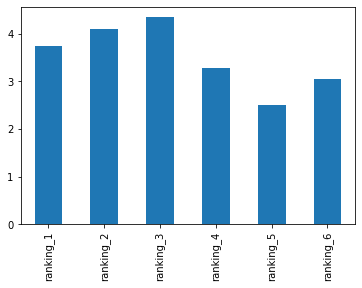

In [4]:
star_wars_rankings = star_wars[star_wars.columns[9:15]]
means = star_wars_rankings.mean(axis=0)
means.plot.bar()


Movie #5 (Empire strikes back) is the best movie by far as reported by viewers.

Movies #1, #2 and #3 were made in late 90's and early 2000 whereas #4, #5 and #6 were in late 70's and early 80's. It looks like people favored movies of the earlier era more than those made later.

# Plot how many users watched a movie

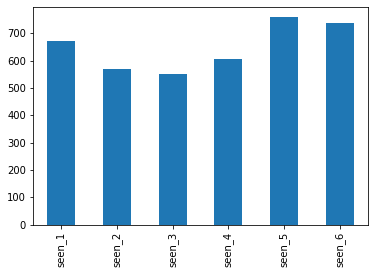

In [5]:
star_wars_seen = star_wars[star_wars.columns[3:9]]
seen = star_wars_seen.sum(axis=0)
seen.plot.bar()


Movie #1, #2 and #3 belong to different era as #4, #5 and #6. Move #5 has been watched the most and so people seem to like it. It seems like an inverse relation between rank and total views. More number of people watched the movie, better is the rank.

# Split the data by gender and redo the above two analysis

In [6]:
males = star_wars[star_wars['Gender'] == 'Male']
females = star_wars[star_wars['Gender'] == 'Female']

## Ranking

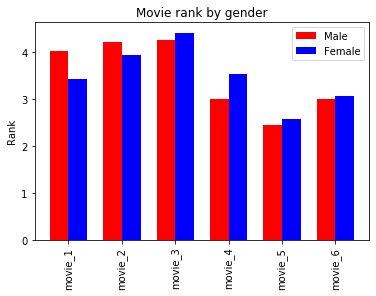

In [7]:
movie_rank_males = males[males.columns[9:15]]
mean_rank_males = movie_rank_males.mean(axis=0)

movie_rank_females = females[females.columns[9:15]]
mean_rank_females = movie_rank_females.mean(axis=0)

ind = np.arange(len(mean_rank_males))
width = 0.35

fig, ax = plt.subplots()
plt_male = ax.bar(ind, mean_rank_males, width, color='r', align='center')
plt_female = ax.bar(ind + width, mean_rank_females, width, color='b', align='center')

# add some text for labels, title and axes ticks
ax.set_ylabel('Rank')
ax.set_title('Movie rank by gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('movie_1', 'movie_2', 'movie_3', 'movie_4', 'movie_5', 'movie_6'), rotation='vertical')

ax.legend((plt_male, plt_female), ('Male', 'Female'))

plt.show()

## Count of movies viewed

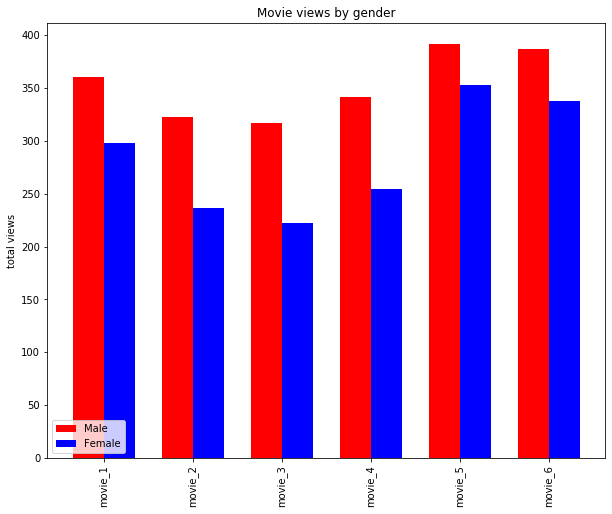

In [8]:
viewed_males = males[males.columns[3:9]]
viewed_count_males = viewed_males.sum(axis=0)

viewed_females = females[females.columns[3:9]]
viewed_count_females = viewed_females.sum(axis=0)

ind = np.arange(len(viewed_count_males))
width = 0.35

fig, ax = plt.subplots()
fig.set_size_inches((10,8))
plt_male = ax.bar(ind, viewed_count_males, width, color='r', align='center')
plt_female = ax.bar(ind+width, viewed_count_females, width, color='b', align='center')

ax.set_ylabel('total views')
ax.set_title('Movie views by gender')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(['movie_1', 'movie_2', 'movie_3', 'movie_4', 'movie_5', 'movie_6'], rotation='vertical')
ax.legend((plt_male, plt_female), ('Male', 'Female'), loc=3)

plt.show()

Overall pattern still follows what we established earlier in the combined bar chart that more the number of people watch a movie, better is the ranking.

Interesting thing to note here is that for movie_1 and movie_2, more males have watched the movie and given a lower rank than females. But from movie_3 to movie_6, the relationship is inversed as stated above.

# Character's respondents view favorably and unfavorably

## Cleanup column 15 to 28

In [9]:
column_dict = {"Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.":"Han Solo", 
               "Unnamed: 16":"Luke Skywalker", 
               "Unnamed: 17":"Princess Leia Organa", "Unnamed: 18":"Anakin Skywalker", 
               "Unnamed: 19":"Obi Wan Kenobi", "Unnamed: 20":"Emperor Palpatine", 
               "Unnamed: 21":"Darth Vader", "Unnamed: 22":"Lando Calrissian" ,"Unnamed: 23":"Boba Fett", "Unnamed: 24":"C-3P0", 
               "Unnamed: 25":"R2 D2", "Unnamed: 26":"Jar Jar Binks", 
               "Unnamed: 27":"Padme Amidala", "Unnamed: 28":"Yoda"}

star_wars = star_wars.rename(column_dict, axis=1)
star_wars['Han Solo'].value_counts()
star_wars.head()



,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ï¿½ï¿½,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3.0,2.0,1.0,4.0,5.0,6.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,True,False,True,True,True,False,False,False,1.0,2.0,3.0,4.0,5.0,6.0,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,True,True,True,True,True,True,True,True,5.0,6.0,1.0,2.0,4.0,3.0,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,True,True,True,True,True,True,True,True,5.0,4.0,6.0,2.0,1.0,3.0,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central


##  Assign scores based for each type of option and map options to score

In [10]:
score_mapper = {"Unfamiliar (N/A)":0, "Very unfavorably":-1, "Somewhat unfavorably":1, 
               "Neither favorably nor unfavorably (neutral)":2, "Somewhat favorably": 3,
               "Very favorably": 4}
def get_score(elem):
    if pd.isnull(elem):
        return np.nan
    return score_mapper[elem]
columns = star_wars.columns[15:29]
for col in columns:
    star_wars[col] = star_wars[col].apply(get_score)


## Get total for each column

Han Solo                2988.0
Luke Skywalker          2951.0
Princess Leia Organa    2920.0
Anakin Skywalker        2101.0
Obi Wan Kenobi          2928.0
Emperor Palpatine       1239.0
Darth Vader             1874.0
Lando Calrissian        1764.0
Boba Fett               1558.0
C-3P0                   2757.0
R2 D2                   2921.0
Jar Jar Binks           1064.0
Padme Amidala           1659.0
Yoda                    2954.0
dtype: float64


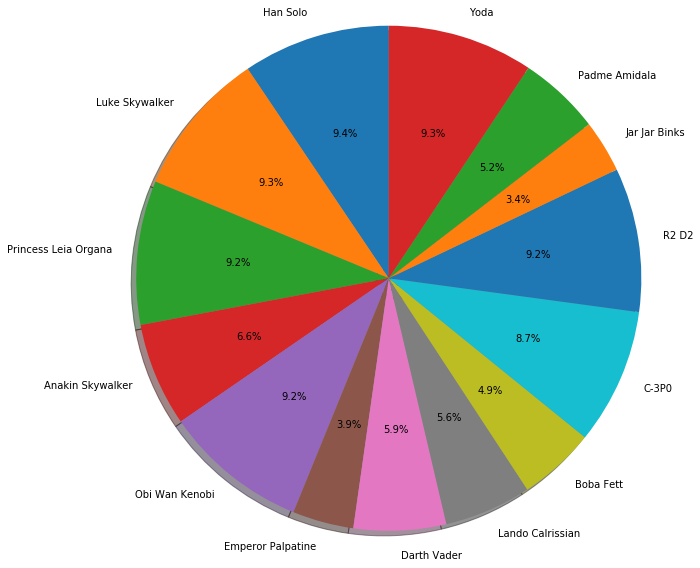

In [11]:
star_wars_stars = star_wars[columns]
star_ratings = star_wars_stars.sum(axis=0)
print(star_ratings)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Frogs', 'Hogs', 'Dogs', 'Logs'
sizes = [15, 30, 45, 10]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
fig1.set_size_inches(10,10)
ax1.pie(star_ratings, labels=star_ratings.index, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Han Solo is the most favourable character (9.4%)
Jar Jar Binks is the least favourable (3.4%)
Anakin Skywalker is controversial (split between likes and dislikes) (Avg: 6.4% which is closer to 6.6%

# Favorite movie per age group

In [12]:
import sys
columns = ['ranking_1','ranking_2', 'ranking_3', 'ranking_4', 'ranking_5', 'ranking_6', 'Age']
rankings_and_age = star_wars[columns]
rankings_per_age = rankings_and_age.groupby('Age').agg(np.mean)
# rankings_per_age = rankings_per_age.min(axis=1)
rankings_per_age
for ind in rankings_per_age.index:
    min_val = sys.maxsize
    min_col = ""
    for col in rankings_per_age.columns:
        if rankings_per_age.loc[ind][col] < min_val:
            min_val = rankings_per_age.loc[ind][col]
            min_col = col
    print("Age group:" + str(ind) + " movie: " + str(min_col))

Age group:18-29 movie: ranking_5
Age group:30-44 movie: ranking_5
Age group:45-60 movie: ranking_5
Age group:> 60 movie: ranking_5


Movie 5 is liked across all age groups

# Favorite character per age group

In [22]:
columns = star_wars.columns[15:29]
columns = columns.tolist()
columns.append('Age')
characters_score_per_age = star_wars[columns].groupby('Age').agg(np.sum)
favourite_char_per_age_grp = characters_score_per_age.idxmax(axis=1)
favourite_char_per_age_grp

Age
18-29              Yoda
30-44          Han Solo
45-60          Han Solo
> 60     Luke Skywalker
dtype: object